# Exercício 01

O problema do código anterior era a banda do filtro que era menor do que a frequencia de uma das senoides que formam o sinal. 

O sinal neste caso é formado pela subtração de senoides em duas frequencias, uma de 80Hz e outra de 200Hz. Como a banda do filtro estava sem, a componente de frequencia de 200 Hz era totalmente cortada e o sinal recuperado não era igual ao original. Aumentando a banda para 220Hz(ligeiramente maior que a maior frequencia) foi possível recuperar o sinal mensagem corretamente

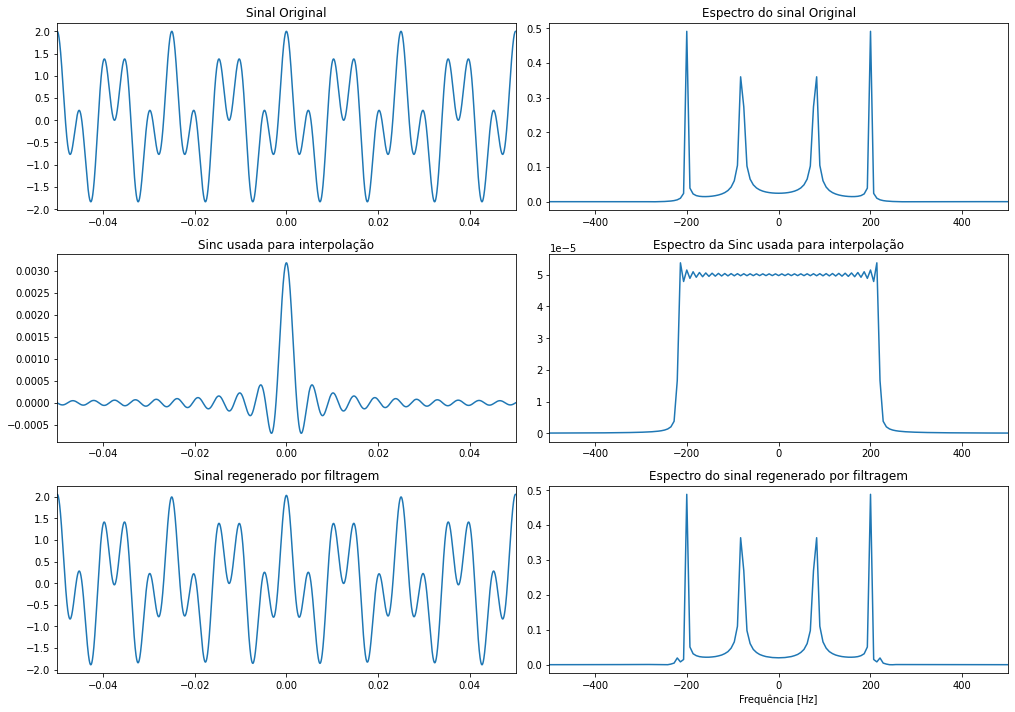

In [2]:

from scipy.fftpack import fft, fftshift
import numpy as np
from matplotlib import pyplot as plt

## Parâmetros da Sinc
B=220                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                       # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
# Espectros
lfft=len(s)                                                # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,Fs/2-Fs/lfft,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[14,10])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("Sinc usada para interpolação")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("Espectro da Sinc usada para interpolação")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()

# Exercício 02

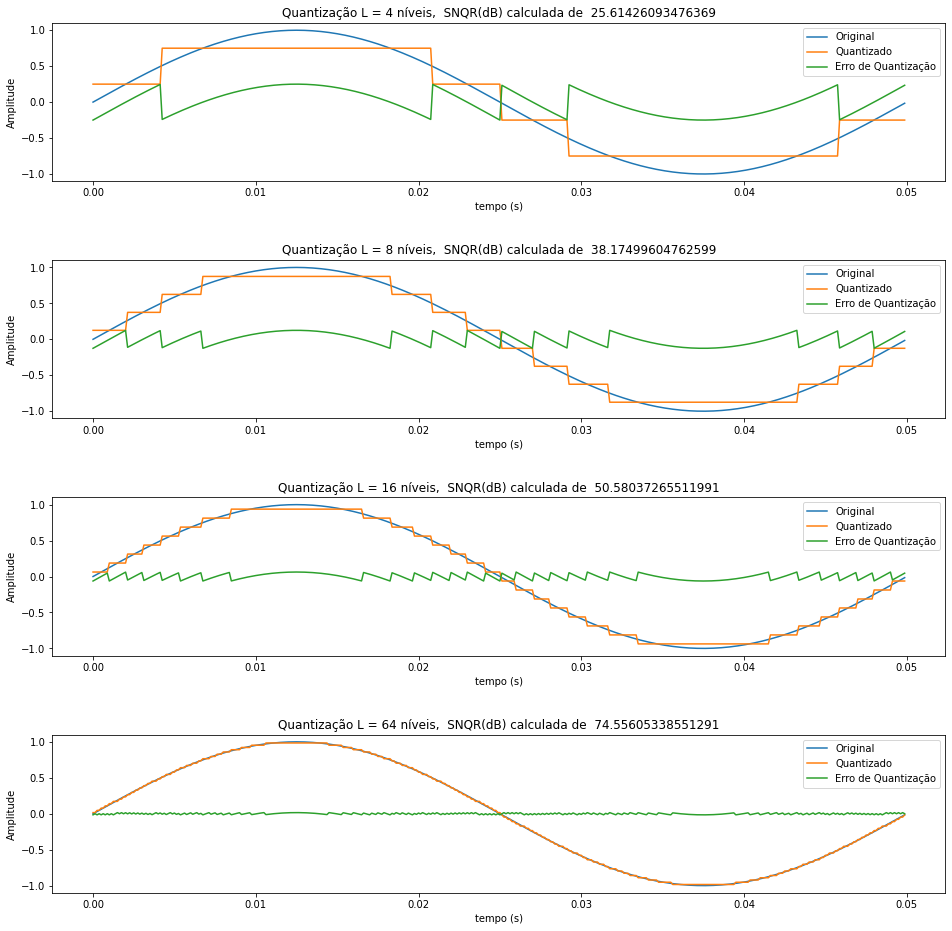

 SNQR com 8 níveis igual a 38.17499604762599
 SNQR com 9 níveis igual a 40.31400062051019
 SNQR com 10 níveis igual a 42.184743831615414
 SNQR com 11 níveis igual a 43.90193168067437
 SNQR com 12 níveis igual a 45.49334805612012
 SNQR com 13 níveis igual a 46.90323666714092
 SNQR com 14 níveis igual a 48.245108677143094
 SNQR com 15 níveis igual a 49.46897328864152


In [3]:

fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [ 4, 8, 16, 64 ];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
fig , axs= plt.subplots(len(L),figsize=(16,16))
fig.subplots_adjust(hspace=0.5)
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp //= Delta                                
    qindex = sigp.astype(int)     #Forçamos o tipo do array como int para usar seus valores como índices
    qindex[qindex >= Li] = Li-1   #Trunca o excedente de qindex
    q_out = q_level[qindex] #Distribui os níveis de cada elemento
    snqr = 20*np.log10( np.linalg.norm(m_t)**2 / np.linalg.norm(m_t - q_out)**2 ) 
    ## Plotting
    axs[il].plot(t, m_t, t, q_out, t, (m_t-q_out))
    axs[il].set_title(f"Quantização L = {Li} níveis,  SNQR(dB) calculada de  {snqr}")
    axs[il].legend(["Original", "Quantizado", "Erro de Quantização"])
    axs[il].set_xlabel("tempo (s)")
    axs[il].set_ylabel("Amplitude")
plt.show()

## PT.2
## colocando uma lista com mais níveis 
for Li in range(8, 16):
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp //= Delta                                
    qindex = sigp.astype(int)     #Forçamos o tipo do array como int para usar seus valores como índices
    qindex[qindex >= Li] = Li-1   #Trunca o excedente de qindex
    q_out = q_level[qindex] #Distribui os níveis de cada elemento
    snqr = 20*np.log10( np.linalg.norm(m_t)**2 / np.linalg.norm(m_t - q_out)**2 )  
    print(f" SNQR com {Li} níveis igual a {snqr}")


# Exercício 03

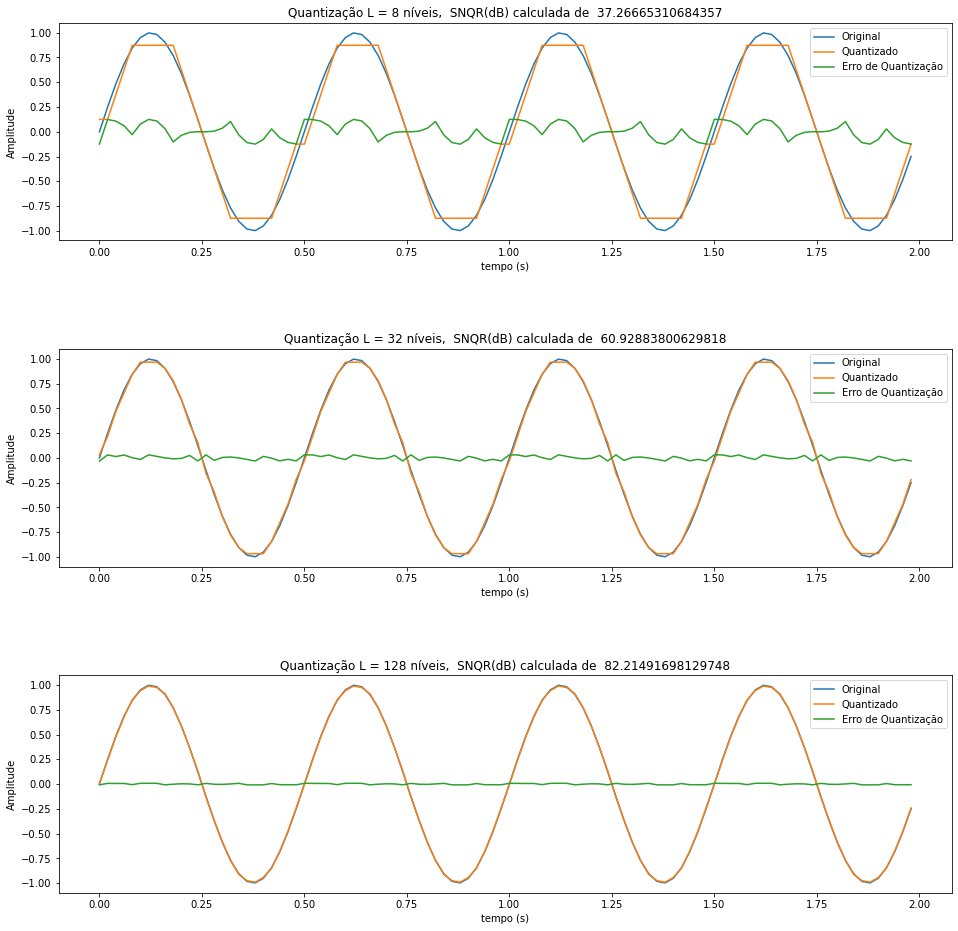

In [4]:
#sinal da prática 01
Ts = 0.02
t = np.arange(0,2,Ts)
m_t = np.sin(t*2*np.pi*2)
L= [ 8, 32, 128 ];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
fig , axs= plt.subplots(len(L),figsize=(16,16))
fig.subplots_adjust(hspace=0.5)
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp //= Delta                                
    qindex = sigp.astype(int)     #Forçamos o tipo do array como int para usar seus valores como índices
    qindex[qindex >= Li] = Li-1   #Trunca o excedente de qindex
    q_out = q_level[qindex] #Distribui os níveis de cada elemento
    snqr = 20*np.log10( np.linalg.norm(m_t)**2 / np.linalg.norm(m_t - q_out)**2 ) 
    ## Plotting
    axs[il].plot(t, m_t, t, q_out, t, (m_t-q_out))
    axs[il].set_title(f"Quantização L = {Li} níveis,  SNQR(dB) calculada de  {snqr}")
    axs[il].legend(["Original", "Quantizado", "Erro de Quantização"])
    axs[il].set_xlabel("tempo (s)")
    axs[il].set_ylabel("Amplitude")
plt.show()

# Exercício 04

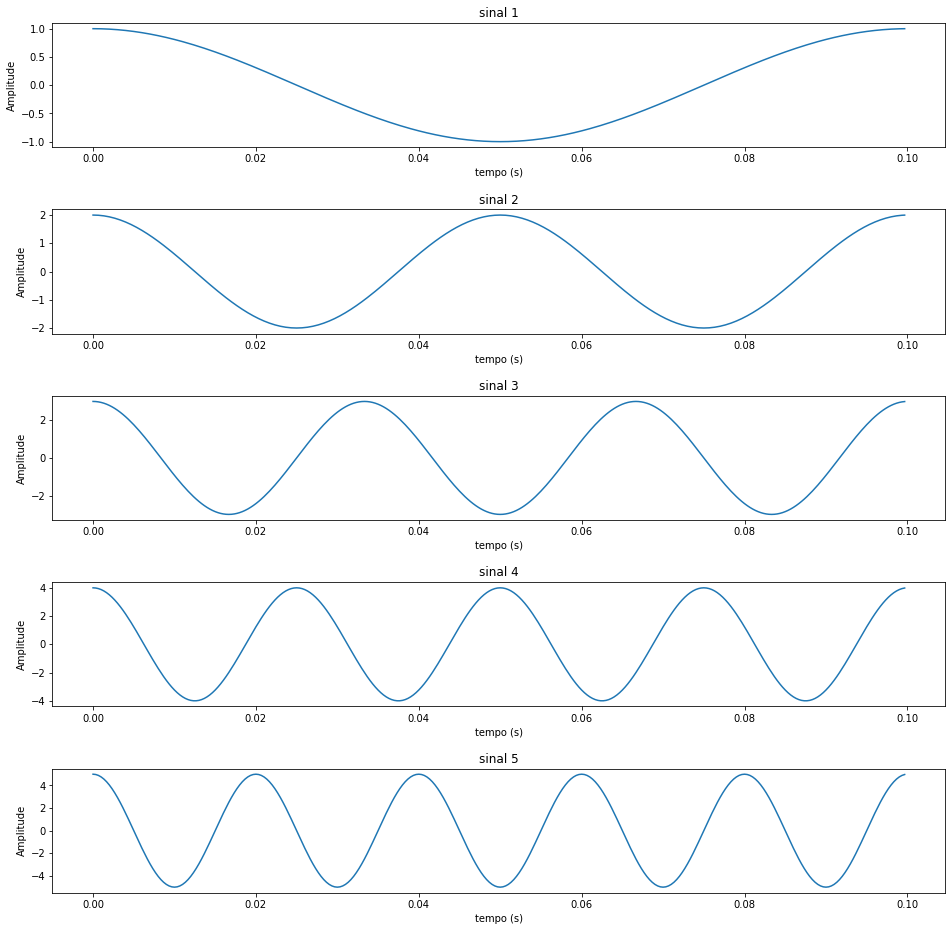

In [33]:
from scipy.io import loadmat
data = loadmat('./Pacientes.mat')
signals = [data.get(f'sinal_{i}') for i in range(1,6)]
signals_reshaped = [signal.reshape(30000,) for signal in signals]
signals_trucated = [signal[0:300] for signal in signals_reshaped]
sample_freq = data.get('Fs')
time_axis = np.arange(0,1,1/sample_freq)
new_time_axis = time_axis[0:300]
#plot dos sinais originais
fig , axs = plt.subplots(5,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)
for i in range(5):
	axs[i].plot(new_time_axis, signals_trucated[i])
	axs[i].set_title(f"sinal {i+1}")
	axs[i].set_xlabel("tempo (s)")
	axs[i].set_ylabel("Amplitude")
plt.show()


